# Independent samples t-test

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [2]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns

## Example

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/appletree.jpg" width=30% >


Below we have data on the average weight, in grams, of apples from each of 20 apple trees.

10 of the trees received MiracleGro fertilizer and the other 10 received Brand X.

Test the hypothesis that the trees given MiracleGro produced heavier apples.

### Inspect the data

The data are provided in a text (.csv) file.

Let's load the data as a Pandas dataframe, and plot them to get a sense for their distribution (is it normal?) and any outliers

In [3]:
# load the data and have a look
pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/AppleWeights.csv')

,Fertilizer,meanAppleWeight
0,BrandX,172
1,BrandX,165
2,BrandX,175
3,BrandX,164
4,BrandX,165
5,BrandX,157
6,BrandX,183
7,BrandX,186
8,BrandX,191
9,BrandX,173


Let's plot the data and see if they look Normally distributed.

As we saw in the session on plotting, a good choice here will be a KDE plot (to get an estimate of the shape of the distribution) and a rug plot (individual data values as the KDE plot is based on only a small sample)

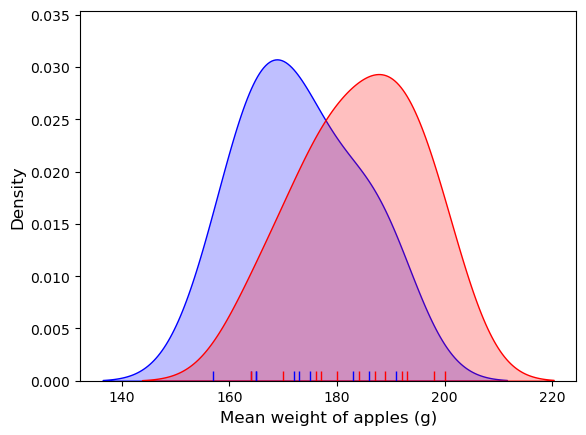

In [4]:
apples = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/AppleWeights.csv')

# let's make separate dataframes for the two brands of fertilizer
apples_BrandX = apples[apples["Fertilizer"]=="BrandX"]
apples_MiracleGro = apples[apples["Fertilizer"]=="MiracleGro"]

sns.kdeplot(apples_BrandX["meanAppleWeight"], color='b', shade=True, label='BrandX')
sns.kdeplot(apples_MiracleGro["meanAppleWeight"], color='r', shade=True, label='MiracleGro')

sns.rugplot(apples_BrandX["meanAppleWeight"], color='b')
sns.rugplot(apples_MiracleGro["meanAppleWeight"], color='r')

plt.xlabel("Mean weight of apples (g)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.show()

It looks like both distributions are unimodal but a bit skewed. 

Typically, it would be hard to say if the data are really non-normal due to the small number 
of data points (the apparent skew could be a fluke). By default, I would err on the side of caution and use a non-parametric test.

However, in this particular case I am confident that the data in each sample are drawn from a normal distribution 
because each data point represents the mean of a large sample (the weights of all apples on one tree) 
and such means are always normally distributed due to the Central Limit theorem.
There is a video explaining why here.

So we can go ahead and use a t-test.

### Hypotheses

Ho: the mean weight of apples is the same for trees fertilized with MiracleGro and Brand X

Ha: the mean weight of apples is greater for trees fertilized with MiracleGro
    
This is a one tailed test as the manufacturers of MiracleGro are only looking for an effect in one direction 
(evidence that MiracleGro is better!)

We will test at the $\alpha = 0.05$ significance level

### Descriptive statistics

First, we obtain the relevant desriptive statistics. By relevant, I mean the ones that go into the equation for the t-test:


$$ t = \frac{\bar{x_1} - \bar{x_2}}{s \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} $$

This would be the sample means $\bar{x_1}$ and $\bar{x_2}$, and the standard deviations for both samples (these feed into the pooled standard deviation $s$) and the sample size $n$.

Remember, <tt>apples</tt> is our original Pandas dataframe:

In [9]:
display(apples)

,Fertilizer,meanAppleWeight
0,BrandX,172
1,BrandX,165
2,BrandX,175
3,BrandX,164
4,BrandX,165
5,BrandX,157
6,BrandX,183
7,BrandX,186
8,BrandX,191
9,BrandX,173


We obtain some commonly used descriptive statistics using the <tt>describe()</tt> method in <tt>pandas</tt>

In [12]:
apples.describe()

,meanAppleWeight
count,22.000000
mean,179.136364
std,12.123552
min,157.000000
25%,170.500000
50%,178.500000
75%,188.500000
max,200.000000


We need the descriptive statistics separately for each fertilizer type. 

We could use the separate dataframes that we created for plotting, but <tt>pandas</tt> has a handy method called <tt>groupby</tt> that will do the job:

In [11]:
apples.groupby(["Fertilizer"]).describe()

meanAppleWeight                                               \
                     count        mean        std    min     25%    50%   
Fertilizer                                                                
BrandX                10.0  173.100000  10.867382  157.0  165.00  172.5   
MiracleGro            12.0  184.166667  11.101460  164.0  176.75  185.5   

                           
               75%    max  
Fertilizer                 
BrandX      181.00  191.0  
MiracleGro  192.25  200.0

It does look like the mean weight of apples from the MiracleGro trees is higher, but is the difference statistically significant?

### Carry out the test

We carry out an independent samples t-test using the function <tt>ttest_ind</tt> from <tt>scipy.stats</tt>, here loaded as <tt>stats</tt>

In [14]:
stats.ttest_ind(apples_MiracleGro["meanAppleWeight"], apples_BrandX["meanAppleWeight"], alternative='greater')

Ttest_indResult(statistic=2.350347501385599, pvalue=0.014564862730138283)

The inputs to stats.ttest are the two samples to be compared (the values in the <tt>meanAppleWeight</tt> column from our separated Pandas data frames <tt>apples_BrandX</tt> and <tt>apples_MiracleGro</tt>) 
and the argument <tt>alternative='greater'</tt>, which tells the computer to run a one tailed test 
that mean of the first input <tt>apples.MiracleGro</tt> is greater than the second <tt>apples.BrandX</tt>.

The outputs are <tt>statistic</tt> ($t=2.35$) and <tt>pvalue</tt> ($p=0.0146$) - if this is less than our $\alpha$ value 0.5, there is a significant difference.

### Degrees of freedom

In a scientific write-up we also need to report the degrees of freedom of the test. This tells us how many observations (data-points) the test was based on, corrected for the number of means we had to estimate from the data in order to do the test.

In the case of the independent samples t-test $df = n_1 + n_2 - 2$ so in this case, df=(10+12-2)=20 and we can report out test results as:

$t(20) = 2.35, p=0.0146$ (one-tailed)

### Interpretation

Our t value of 2.35 means that the difference in mean apple weights between MiracleGro and BrandX trees is 2.35 times the standard error (where $ SE = s \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$).

Such a large difference (in the expected direction) would occur 0.0146 (1.46%) of the time due to chance if the null hypothesis were true (if MiracleGro was really no better than Brand X), hence the p value of 0.0146.

This diagram shows the expected distribution of t-values if the null were true, with our obtained t-value marked:

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/ttestApples.png" width=50% alt="There should be a picture of the t-distribution here" >

### Draw conclusions

As p<0.05 we conclude that the mean weight of apples on trees fertilized with MiracleGro is indeed greater than the mean weight of apples on trees fertilized with Brand X

## Write-up 
<br>

<div style = "    padding-top: 10px;
    padding-bottom: 10px;
    padding-left: 10px;
    padding-right: 10px;
    box-shadow: 0px 8px 16px 0px rgba(0,0,0,0.2);
    vertical-align: middle;">
    
Above, I walked you through how to run the t-test and why we make different choices. 
    
In this section we revisit the analysis, but here we practice writing up our analysis in the correct style for a scientific report. 
    
Replace the XXXs with the correct values!    

</div>

<br>

    
We tested the hypothesis that the mean weight of apples produced by trees fertilized with MiracleGro was higher than for trees fertilized with Brand X.

The mean apple weight was measured for each of XX trees fertilized with MiracleGro (mean of mean apple weights over XX trees XXX.Xg, sd of mean apple weights over 100 trees, XXX.Xg) and XX trees fertilized with Brand X (mean over XX trees XXX.Xg, sd XXX.Xg).


In [17]:
apples = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/AppleWeights.csv')
apples.groupby(["Fertilizer"]).describe()

meanAppleWeight                                               \
                     count        mean        std    min     25%    50%   
Fertilizer                                                                
BrandX                10.0  173.100000  10.867382  157.0  165.00  172.5   
MiracleGro            12.0  184.166667  11.101460  164.0  176.75  185.5   

                           
               75%    max  
Fertilizer                 
BrandX      181.00  191.0  
MiracleGro  192.25  200.0

Theoretical considerations suggest that data for each group of trees should be drawn from a normal distribution: as individual data points were themselves the means of large samples (all apples from a given tree), these data points should follow a normal distribubtion due to the Central Limit Theorem. This was supported by a plot of the data:

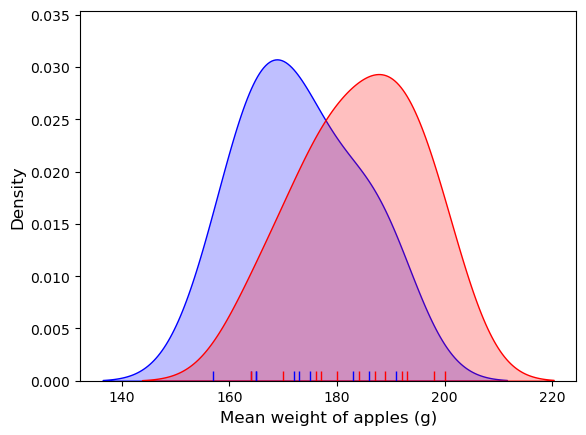

In [5]:
# let's make separate dataframes for the two brands of fertilizer
apples_BrandX = apples[apples["Fertilizer"]=="BrandX"]
apples_MiracleGro = apples[apples["Fertilizer"]=="MiracleGro"]

sns.kdeplot(apples_BrandX["meanAppleWeight"], color='b', shade=True, label='BrandX')
sns.kdeplot(apples_MiracleGro["meanAppleWeight"], color='r', shade=True, label='MiracleGro')

sns.rugplot(apples_BrandX["meanAppleWeight"], color='b')
sns.rugplot(apples_MiracleGro["meanAppleWeight"], color='r')

plt.xlabel("Mean weight of apples (g)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.show()

An independent samples t-test was therefore used to compare the means (alpha = XXX, XXX-tailed). 

In [18]:
stats.ttest_ind(apples_MiracleGro["meanAppleWeight"], apples_BrandX["meanAppleWeight"], alternative='greater')

Ttest_indResult(statistic=2.350347501385599, pvalue=0.014564862730138283)

The weight of apples from the trees fertilized with MiracleGro was indeed found to be significantly higher: t(18) = 2.35, p=0.0146.

## Exercises

<ol>
<li> Can you work out how to run a two-tailed test on the data?
    <ul>
<li> Info on the possible values for 'alternative' can be found on the
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html"> scipy reference page </a>
    </ul>
<li> What happens to the p value if you run a two tailed test instead of one tailed? Is it more or less significant? Why?
</ol>